## Modelling Penguins
---

Step by step

### Pre 1 - Pipeline Functions 

In [1]:
def genLUPs(ser): 
    """Pass in a series to the function. The function will return two dicionaries in a tuple
    Based on the unique fields in the series:
    1) a dictionary to be used as the basis for a dimension,
    2) a lookup to be used to encode the fact table
    """
    ser_dict = dict(enumerate(ser.unique())) 
    return ser_dict, {value: key for key, value in ser_dict.items()}

In [2]:
def retNulls(df):
    """Pass in a DataFrame to check for nulls
    Returns:
    1) A series containing fields with nulls and count of nulls
    2) A series showing the pct nulls of the fields
    """
    sorted_nulls = df.isnull().sum().sort_values(ascending=False)
    return sorted_nulls[sorted_nulls > 0], (sorted_nulls[sorted_nulls > 0] / df.shape[0]) * 100

### Pre 2 - Import All Libraries

In [3]:
#!pip3 install ydata-profiling
#!pip3 install --upgrade notebook ipywidgets
#!pip install Ipython
#!pip3 install pyarrow
#!pip3 install matplotlib

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib
from matplotlib import pyplot as plt

#from Ipython.display import display
#pd.set_options('display.max_columns', None

### Step 1 - import the raw data file and load to a temporary df

In [4]:
penguins_size = pd.read_csv('./penguins_size.csv')
penguins_size.shape

(344, 7)

In [5]:
# Copy and Load the import to a working df
df = penguins_size.copy()
df.shape

(344, 7)

### Step 2 - EDA

In [6]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
# alternatively you can write the  block of code in stacking form instead of chaining form
sorted_nulls = (
                 df
                 .isnull()
                 .sum() 
                 .sort_values(ascending = False)
                )
sorted_nulls[sorted_nulls > 0]

sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
dtype: int64

In [10]:
#chaining form for code above
# return only the features with nulls / NaN values
sorted_nulls = df.isnull().sum().sort_values(ascending=False)
sorted_nulls[sorted_nulls > 0]

sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
dtype: int64

In [11]:
#percent nulls...
(sorted_nulls[sorted_nulls > 0] / df.shape[0]) * 100

sex                  2.906977
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
dtype: float64

In [12]:
# you can return the dataset without nulls by checking for nulls 
df[df.culmen_depth_mm.isnull()]  
 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
# and negating(inverse) it using "~"  then you can pass it into the df
df = df[~df.culmen_depth_mm.isnull()]   
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [14]:
df.isnull().sum() 

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [15]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [16]:
df['species'].nunique(), df['species'].unique()

(3, array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object))

In [17]:
df['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [19]:
#ProfileReport(df, title='penguins_size')

### Step 3 Set the data type if the type needs to be casted and index if desired 

In [20]:
genLUPs(df['species'])

({0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'},
 {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

### Step 4 Handle all nulls in the df

In [40]:
df['sex'].nunique(), df['sex'].unique()

(3, array(['MALE', 'FEMALE', '.'], dtype=object))

In [41]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [21]:
# store the eight null values for sex to a var called missing sex
# and remove those five from the df

# missing_sex - 8 records
missing_sex = df[df['sex'].isnull()]
missing_sex

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [37]:
# theres a dot value for sex which isnt a null but a wrong input
sum(df['sex'] == '.')

1

In [45]:
missing_sex_2 = df[df['sex'] == '.']
missing_sex_2 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [46]:
# inverse or negate the dataset with dot(.) to get the dataset without(.) nulls pass into a dataframe
df = df[df['sex'] != '.']
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [26]:
# inverse or negate the dataset with nulls to get the dataset without nulls pass into a dataframe
df = df[~df['sex'].isnull()]
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Step 5 - Visual Analysis

In [71]:
sns.set_theme(style="darkgrid", palette="deep")

In [70]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [54]:
df['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

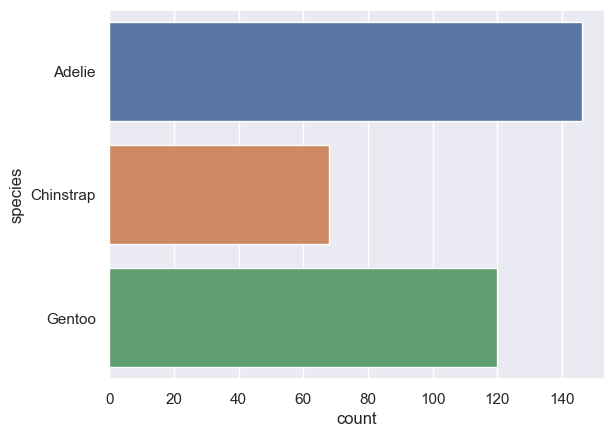

In [79]:
sns.countplot(data=df, y='species');

In [61]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [68]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]

<Axes: >

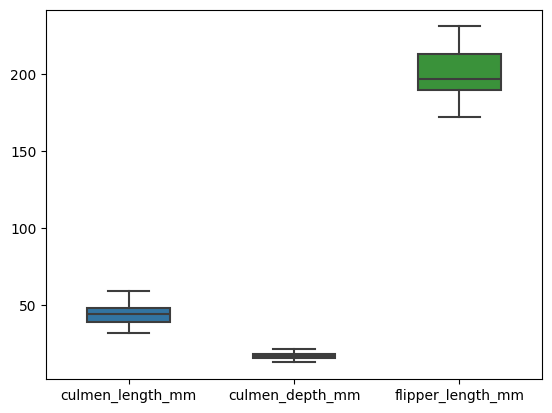

In [69]:
sns.boxplot(df1, width=0.5,fliersize=5)

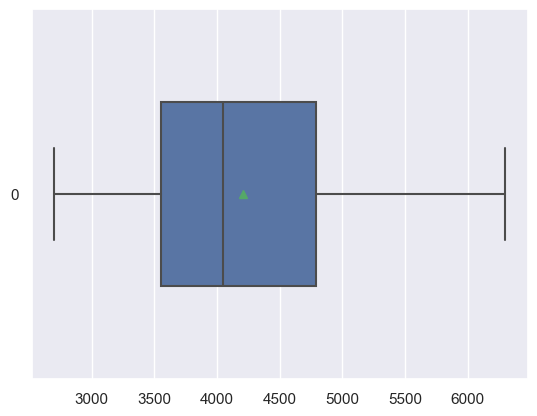

In [76]:
sns.boxplot(df['body_mass_g'], width=0.5,fliersize=5, orient='h', showmeans=True);

In [77]:
df[['body_mass_g']].describe()

,body_mass_g
count,334.000000
mean,4209.056886
std,804.836129
min,2700.000000
25%,3550.000000
50%,4050.000000
75%,4793.750000
max,6300.000000


In [ ]:
#sns.pairplot(df,hue='species');

In [ ]:
# facet / scatter
sns.FacetGrid(df, hue='species').map(plt.scatter, 'culmen_length_mm', 'culmen_depth_mm').add_legend();

### Step 6 - Identify lookups / dimensions 

### Create 'Species' dictionary and corresponding lookup

In [27]:
# using the function 
dict_species, lup_species = genLUPs(df['species'])
dict_species, lup_species

({0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'},
 {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [48]:
df['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

### Create 'Island' dictionary and corresponding lookup

In [29]:
dict_island, lup_island = genLUPs(df['island'])
dict_island, lup_island

({0: 'Torgersen', 1: 'Biscoe', 2: 'Dream'},
 {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})

In [49]:
df['island'].value_counts()

island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

### Create 'Sex' dictionary and corresponding lookup

In [50]:
dict_sex, lup_sex = genLUPs(df['sex'])
dict_sex, lup_sex

({0: 'MALE', 1: 'FEMALE', 2: '.'}, {'MALE': 0, 'FEMALE': 1, '.': 2})

In [51]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

### Step 8 Load it to a table

In [ ]:
gender_missing = pd.concat([missing_sex, missing_sex_2], axis=0)

In [ ]:
conn = sqlite3.connect('')

In [ ]:
df.to_sql('PenguinsClean', con=engine, if_exists='replace', index=False)
gender_missing.to_sql('Gender_missing', con=engine, if_exists='replace', index=False)

In [ ]:
conn.close()